# Ridge Regression part-1 | Regularized Linear Models

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df = load_diabetes()

In [4]:
df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [12]:
X= df.data
y = df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Using linear regression

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.4526027629719196

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

53.85344583676592

### Using ridge regression

In [20]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha = 0.0001)

In [21]:
rd.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [22]:
y_pred1 = rd.predict(X_test)

In [23]:
r2_score(y_test,y_pred1)

0.4526998154220099

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred1))

53.84867157029351

### Non-linear dataset example

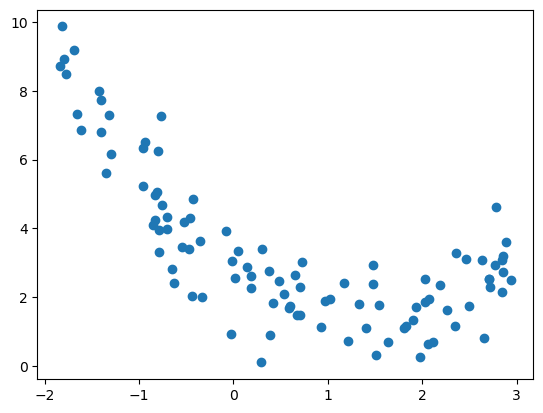

In [25]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1,x2)

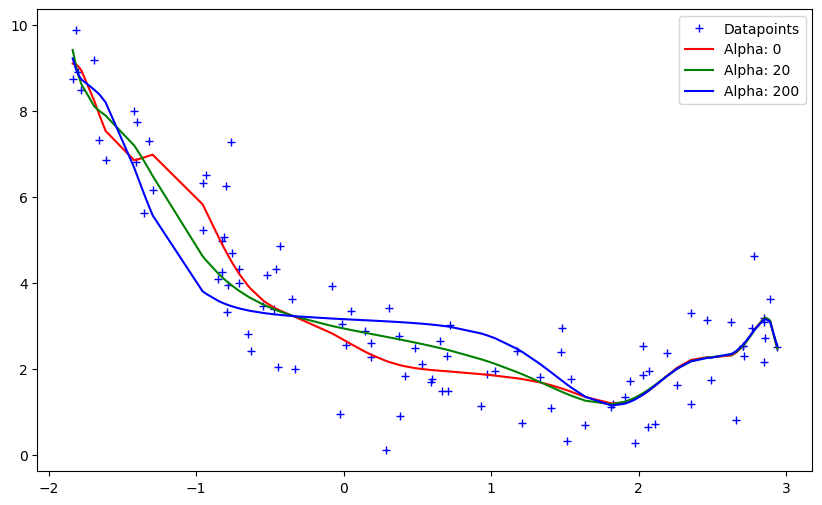

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2, alpha):
    model= Pipeline([
        ('poly feats',PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2, 'b+', label = 'Datapoints')
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1,x2, alpha)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()